In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_excel('Airlines+Data.xlsx')

In [42]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [72]:
df.shape

(96, 2)

In [43]:
df['Month']=pd.to_datetime(df['Month'])

In [44]:
df.set_index('Month',inplace=True)

In [45]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

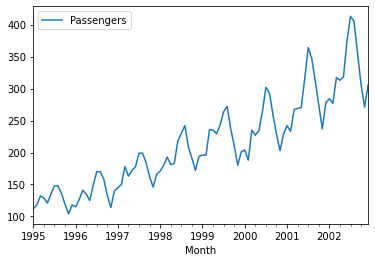

In [46]:
df.plot()

In [47]:
df.Passengers = np.sqrt(df['Passengers'])

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
test_result = adfuller(df['Passengers'])

In [50]:
print("p_value" , test_result[1])  #Hence it is non-stationary

p_value 0.9833197981745521


In [51]:
df['Seasonal_Diff']=df.diff(periods=12)

In [53]:
df

,Passengers,Seasonal_Diff
Month,,
1995-01-01,10.583005,NaN
1995-02-01,10.862780,NaN
1995-03-01,11.489125,NaN
1995-04-01,11.357817,NaN
1995-05-01,11.000000,NaN
...,...,...
2002-08-01,20.124612,1.496676
2002-09-01,18.841444,1.177922
2002-10-01,17.492856,0.939910


In [54]:
test_result1 = adfuller(df['Seasonal_Diff'].dropna())

In [55]:
test_result1[1]

0.04325785016386734

In [56]:
df

,Passengers,Seasonal_Diff
Month,,
1995-01-01,10.583005,NaN
1995-02-01,10.862780,NaN
1995-03-01,11.489125,NaN
1995-04-01,11.357817,NaN
1995-05-01,11.000000,NaN
...,...,...
2002-08-01,20.124612,1.496676
2002-09-01,18.841444,1.177922
2002-10-01,17.492856,0.939910


<AxesSubplot:xlabel='Month'>

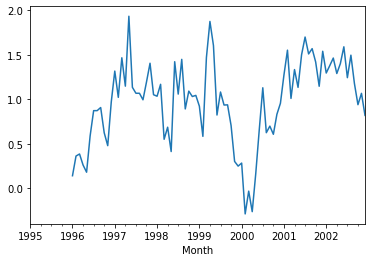

In [59]:
df['Seasonal_Diff'].plot()

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

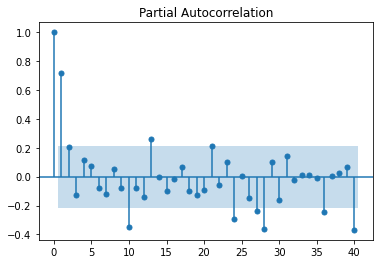

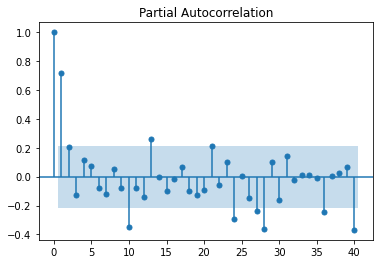

In [64]:
plot_pacf(df['Seasonal_Diff'].iloc[13:],lags=40)

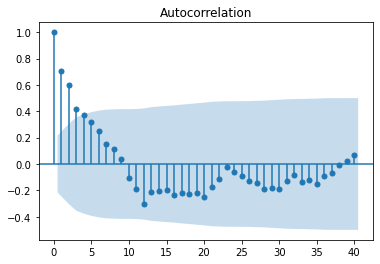

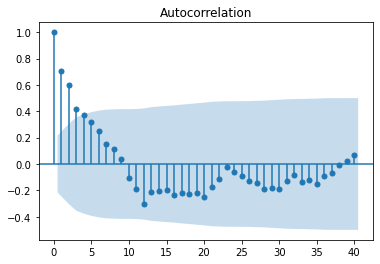

In [65]:
plot_acf(df['Seasonal_Diff'].iloc[13:],lags=40)

In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
model = ARIMA(df['Passengers'],order=(3,1,4))

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was p

In [70]:
fitted_model = model.fit()

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [71]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 -82.811
Method:                       css-mle   S.D. of innovations              0.550
Date:                Mon, 11 Oct 2021   AIC                            183.621
Time:                        22:49:34   BIC                            206.606
Sample:                    02-01-1995   HQIC                           192.909
                         - 12-01-2002                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0809      0.005     16.257      0.000       0.071       0.091
ar.L1.D.Passengers     0.9302      0.202      4.598      0.000       0.534       1.327
ar.L2.D.Passengers    -0.8521      0.220     -3.874      0.000      -1.283      -0.421
ar.L3.D.Passengers     0.0294      0.188      0.157      0.876      -0.338       0.397
ma.L1.D.Passengers    -0.9933      0.191     -5.213      0.000      -1.367      -0.620
ma.L2.D.Passengers     0.5328      0.343      1.552      0.121      -0.140       1.205
ma.L3.D.Passengers     0.1426      0.261      0.547      0.584      -0.368       0.653
ma.L4.D.Passengers    -0.6820      0.206     -3.307      0.001      -1.086      -0.278
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5453           -0.9602j            1.1043           -0.1678
AR.2            0.5453           +0.9602j            1.1043            0.1678
AR.3           27.9343           -0.0000j           27.9343           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            0.3377           -0.9413j            1.0000           -0.1952
MA.3            0.3377           +0.9413j            1.0000            0.1952
MA.4           -1.4663           -0.0000j            1.4663           -0.5000
-----------------------------------------------------------------------------
"""

In [73]:
df['forecast']=fitted_model.predict(start=70,end=96,dynamic=True)

<AxesSubplot:xlabel='Month'>

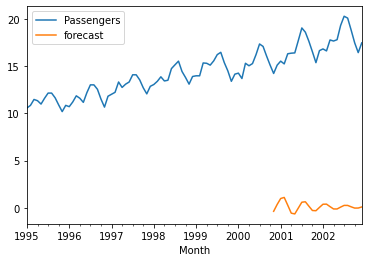

In [74]:
df[['Passengers','forecast']].plot()

In [75]:
import statsmodels.api as sm

In [77]:
models = sm.tsa.statespace.SARIMAX(df['Passengers'],order=(3,1,4),seasonal_order=(3,1,4,12))

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [78]:
results = models.fit()

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
df['forecast']=results.predict(start=70,end=96,dynamic=True)

<AxesSubplot:xlabel='Month'>

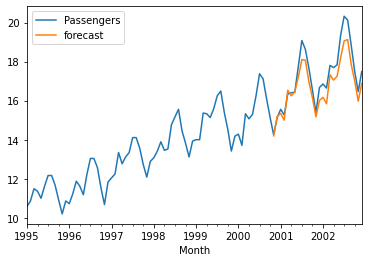

In [80]:
df[['Passengers','forecast']].plot()

In [81]:
from pandas.tseries.offsets import DateOffset

In [82]:
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [83]:
future_dataset_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [84]:
future_dataset_df

,Passengers,Seasonal_Diff,forecast
2003-01-01,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN
2003-06-01,NaN,NaN,NaN
2003-07-01,NaN,NaN,NaN
2003-08-01,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN
2003-10-01,NaN,NaN,NaN


In [86]:
final_df = pd.concat([df,future_dataset_df])

In [87]:
final_df['forecast'] = results.predict(start =97,end=120,dyamic=True)

<AxesSubplot:>

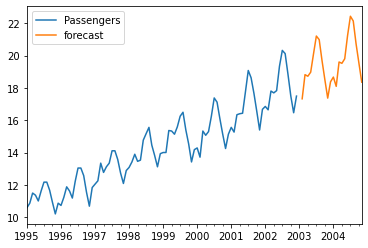

In [89]:
final_df[['Passengers','forecast']].plot()